In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

names = ["Sample code number",'Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','class']
data = pd.read_csv("/content/drive/My Drive/Files for Colab/Breast_Cancer Dataset/breast-cancer-wisconsin.data",header=None,names=names)
data

Mounted at /content/drive


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
for feature in data.columns:
  if feature!='Sample code number':
    print( data[feature].unique() )
data[ data['Bare Nuclei']=='?' ].shape[0]

[ 5  3  6  4  8  1  2  7 10  9]
[ 1  4  8 10  2  3  7  5  6  9]
[ 1  4  8 10  2  3  5  6  7  9]
[ 1  5  3  8 10  4  6  2  9  7]
[ 2  7  3  1  6  4  5  8 10  9]
['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
[ 3  9  1  2  4  5  7  8  6 10]
[ 1  2  7  4  5  3 10  6  9  8]
[ 1  5  4  2  3  7 10  8  6]
[2 4]


16

In [ ]:
value = data['Bare Nuclei'].mode()[0]
print(value)

data.replace('?',value,inplace=True)
for feature in data.columns:
  if feature!='Sample code number':
    print( data[feature].unique() )
data['Bare Nuclei']=pd.to_numeric(data['Bare Nuclei'])

for feature in data.columns:
  if feature!='Sample code number':
    print( data[feature].unique() )

'''
data['Bare Nuclei']=pd.to_numeric(data['Bare Nuclei'],errors="coerce")
'''

1
[ 5  3  6  4  8  1  2  7 10  9]
[ 1  4  8 10  2  3  7  5  6  9]
[ 1  4  8 10  2  3  5  6  7  9]
[ 1  5  3  8 10  4  6  2  9  7]
[ 2  7  3  1  6  4  5  8 10  9]
['1' '10' '2' '4' '3' '9' '7' '5' '8' '6']
[ 3  9  1  2  4  5  7  8  6 10]
[ 1  2  7  4  5  3 10  6  9  8]
[ 1  5  4  2  3  7 10  8  6]
[2 4]
[ 5  3  6  4  8  1  2  7 10  9]
[ 1  4  8 10  2  3  7  5  6  9]
[ 1  4  8 10  2  3  5  6  7  9]
[ 1  5  3  8 10  4  6  2  9  7]
[ 2  7  3  1  6  4  5  8 10  9]
[ 1 10  2  4  3  9  7  5  8  6]
[ 3  9  1  2  4  5  7  8  6 10]
[ 1  2  7  4  5  3 10  6  9  8]
[ 1  5  4  2  3  7 10  8  6]
[2 4]


'\ndata[\'Bare Nuclei\']=pd.to_numeric(data[\'Bare Nuclei\'],errors="coerce")\n'

In [ ]:
'''
for col in data.iloc[:,1:-1].columns:
    data[col] = (data[col] - data[col].mean()) / data[col].std()
print(data)
'''

'\nfor col in data.iloc[:,1:-1].columns:\n    data[col] = (data[col] - data[col].mean()) / data[col].std()\nprint(data)\n'

In [ ]:
'''
import matplotlib.pyplot as plt
import seaborn as sns
data.iloc[:,1:-1].boxplot()
plt.xticks(rotation=45, ha='right')

data_beningn = data[ data['class']==2 ].drop(columns=['class','Sample code number'],axis=1)
data_malignant = data[ data['class']==4 ].drop(columns=['class','Sample code number'],axis=1)

data_beningn.boxplot()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

data_malignant.boxplot()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

data = data_beningn

for feature in data.iloc[:,1:-1].columns:
  Q1 = data[feature].quantile(0.25)
  Q3 = data[feature].quantile(0.75)
  IQR = Q3 - Q1

  # Define thresholds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Filter out outliers
  outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
  #print(outliers)
  data = data[~data[feature].isin(outliers[feature])]
data.iloc[:,1:-1].boxplot()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
'''

"\nimport matplotlib.pyplot as plt\nimport seaborn as sns\ndata.iloc[:,1:-1].boxplot()\nplt.xticks(rotation=45, ha='right')\n\ndata_beningn = data[ data['class']==2 ].drop(columns=['class','Sample code number'],axis=1)\ndata_malignant = data[ data['class']==4 ].drop(columns=['class','Sample code number'],axis=1)\n\ndata_beningn.boxplot()\nplt.xticks(rotation=45, ha='right')\nplt.tight_layout()\nplt.show()\n\ndata_malignant.boxplot()\nplt.xticks(rotation=45, ha='right')\nplt.tight_layout()\nplt.show()\n\ndata = data_beningn\n\nfor feature in data.iloc[:,1:-1].columns:\n  Q1 = data[feature].quantile(0.25)\n  Q3 = data[feature].quantile(0.75)\n  IQR = Q3 - Q1\n\n  # Define thresholds for outliers\n  lower_bound = Q1 - 1.5 * IQR\n  upper_bound = Q3 + 1.5 * IQR\n\n  # Filter out outliers\n  outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]\n  #print(outliers)\n  data = data[~data[feature].isin(outliers[feature])]\ndata.iloc[:,1:-1].boxplot()\nplt.xticks(rotation

In [ ]:
data.iloc[:,1:-1].corr()

,Clump Thickness,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
Clump Thickness,1.000000,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034
Uniformity of Cell Shape,0.654589,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911
Marginal Adhesion,0.486356,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633
Single Epithelial Cell Size,0.521816,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101
Bare Nuclei,0.590008,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397
Bland Chromatin,0.558428,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169
Normal Nucleoli,0.535835,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336
Mitoses,0.350034,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000


In [ ]:
df = data.iloc[:,1:-1]

corr_matrix = df.corr().to_numpy()

for i in range(corr_matrix.shape[0]):
    print(sum(corr_matrix[i][:]))

data.drop('Uniformity of Cell Size',axis=1,inplace=True)
data.iloc[:,1:-1].corr()

5.341978827330982
6.6331271091900685
6.56599809684232
5.829287872069522
5.900668307057793
5.8262172129777445
6.017176777522434
5.879370477789987
4.259274552562125


,Clump Thickness,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
Clump Thickness,1.000000,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034
Uniformity of Cell Shape,0.654589,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911
Marginal Adhesion,0.486356,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633
Single Epithelial Cell Size,0.521816,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101
Bare Nuclei,0.590008,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397
Bland Chromatin,0.558428,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169
Normal Nucleoli,0.535835,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336
Mitoses,0.350034,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000


In [ ]:
x=data.iloc[:,1:-1]
y=data.iloc[:,-1]
print(x,y)

     Clump Thickness  Uniformity of Cell Shape  Marginal Adhesion  \
0                  5                         1                  1   
1                  5                         4                  5   
2                  3                         1                  1   
3                  6                         8                  1   
4                  4                         1                  3   
..               ...                       ...                ...   
694                3                         1                  1   
695                2                         1                  1   
696                5                        10                  3   
697                4                         6                  4   
698                4                         8                  5   

     Single Epithelial Cell Size  Bare Nuclei  Bland Chromatin  \
0                              2            1                3   
1                              7       

In [ ]:
data

,Sample code number,Clump Thickness,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,class
0,1000025,5,1,1,2,1,3,1,1,2
1,1002945,5,4,5,7,10,3,2,1,2
2,1015425,3,1,1,2,2,3,1,1,2
3,1016277,6,8,1,3,4,3,7,1,2
4,1017023,4,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,3,2,1,1,1,2
695,841769,2,1,1,2,1,1,1,1,2
696,888820,5,10,3,7,3,8,10,2,4
697,897471,4,6,4,3,4,10,6,1,4


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

train_data = pd.DataFrame( np.concatenate(   ( np.array(X_train) , np.array(y_train).reshape(-1,1) ) , axis=1   ) , columns=data.columns[1:])
test_data = pd.DataFrame( np.concatenate(   ( np.array(X_test) , np.array(y_test).reshape(-1,1) ) , axis=1   ) , columns=data.columns[1:])
#train_data = data.iloc[:690,1:]
#test_data = data.iloc[690:,1:]
#print(train_data)

In [ ]:
features_CPT = {}
classes = data['class'].unique()
for feature in train_data.columns:
    if(feature=='class'): break
    unique_values = data[feature].unique()
    #print(unique_values)

    features_CPT[feature] = {}

    for value in unique_values:
        features_CPT[feature][value] = [
            ( ((train_data[feature] == value) & (train_data['class'] == cls)).sum()+ (1 if cls==2 else 0) ) / ( (train_data['class'] == cls).sum()+ (unique_values.size if cls==2 else 0 ))
            #( ((train_data[feature] == value) & (train_data['class'] == cls)).sum()) / ( (train_data['class'] == cls).sum() )

            #float( (len( train_data[(train_data[feature] == value) & (train_data['class'] == cls)] ) )/ ( len( train_data[train_data['class'] == cls] ) ) )
            #float( (len( data[(data[feature] == value) & (data['class'] == cls)] )+ (1 if cls==2 else 0) )/ ( len( data[data['class'] == cls])+ (unique_values.size if cls==2 else 0 )))
            for cls in classes
        ]

for key,value in features_CPT.items():
  print(key)
  for k,v in value.items():
    print(k,':',v)


Clump Thickness
5 : [0.18157894736842106, 0.19047619047619047]
3 : [0.20526315789473684, 0.047619047619047616]
6 : [0.042105263157894736, 0.08994708994708994]
4 : [0.14736842105263157, 0.0582010582010582]
8 : [0.013157894736842105, 0.1746031746031746]
1 : [0.3, 0.015873015873015872]
2 : [0.1, 0.010582010582010581]
7 : [0.005263157894736842, 0.08994708994708994]
10 : [0.002631578947368421, 0.26455026455026454]
9 : [0.002631578947368421, 0.0582010582010582]
Uniformity of Cell Shape
1 : [0.7473684210526316, 0.005291005291005291]
4 : [0.031578947368421054, 0.12698412698412698]
8 : [0.005263157894736842, 0.10582010582010581]
10 : [0.002631578947368421, 0.26455026455026454]
2 : [0.11052631578947368, 0.031746031746031744]
3 : [0.07105263157894737, 0.10052910052910052]
5 : [0.010526315789473684, 0.12698412698412698]
6 : [0.010526315789473684, 0.1111111111111111]
7 : [0.007894736842105263, 0.09523809523809523]
9 : [0.002631578947368421, 0.031746031746031744]
Marginal Adhesion
1 : [0.79736842105

In [ ]:
predicted_data=[]
predicted_probabilities=[] #for each row of the test_data

#print(test_data.shape)
for index, row_data in test_data.iterrows():
  P_X_Y=[1]*classes.size
  for feature in test_data.columns:
    if(feature=='class'):
      for i in range(classes.size):
        P_X_Y[i] *= (train_data['class'] == classes[i]).sum() / train_data.shape[0]
      break
    value = row_data[feature]
    for i in range(classes.size):
      P_X_Y[i] *= features_CPT[feature][value][i]

  P_Y_X = []
  for i in range(classes.size):
    if(sum(P_X_Y)!=0):
      P_Y_X.append( P_X_Y[i]/sum(P_X_Y) )
    else:
      P_Y_X.append( -1 )
  predicted_probabilities.append(P_Y_X)
  predicted_data.append( classes[ P_Y_X.index( max(P_Y_X) ) ] )
predicted_probabilities
print(predicted_data)
print(test_data.iloc[:,-1])

[4, 4, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2]
0      4
1      4
2      4
3      2
4      2
      ..
135    2
136    4
137    2
138    2
139    2
Name: class, Length: 140, dtype: int64


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, predicted_data)
print(cm)
print("Accuracy :",accuracy_score(y_test, predicted_data))
print(classification_report(y_test, predicted_data))

[[78  7]
 [ 2 53]]
Accuracy : 0.9357142857142857
              precision    recall  f1-score   support

           2       0.97      0.92      0.95        85
           4       0.88      0.96      0.92        55

    accuracy                           0.94       140
   macro avg       0.93      0.94      0.93       140
weighted avg       0.94      0.94      0.94       140



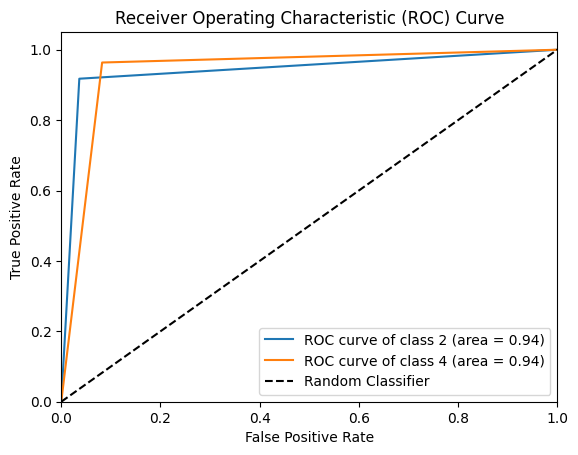

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize, OneHotEncoder
import matplotlib.pyplot as plt

y_predict = predicted_data
y_poss = classes
#y_test_bin = label_binarize(y_test, classes=[2,4])
#y_predict_bin = label_binarize(y_predict, classes=[2,4])

encoder = OneHotEncoder(sparse_output=False)

y = np.array(y_predict).reshape(-1, 1)
y_predict_onehot = encoder.fit_transform(y)

y = np.array(y_test).reshape(-1,1)
y_test_onehot = encoder.fit_transform(y)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(y_poss)):
    fpr[i], tpr[i], thresholds_used = roc_curve(y_test_onehot[:,i], y_predict_onehot[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(len(y_poss)):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(y_poss[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
